CRCHistoPhenotypes Dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import tensorflow as tf
import plotly.graph_objects as go
url = "./data_labels_mainData.csv"
lm = pd.read_csv(url, header=0, sep=",")
url = "./data_labels_extraData.csv"
le = pd.read_csv(url, header = 0, sep = ",")

In [ ]:
# import tensorflow_datasets as tfds

from tensorflow.keras import layers

In [ ]:
lm.head()

In [ ]:
lm["cellTypeName"].unique()

In [5]:
lm.groupby("cellTypeName")["cellType"].count()

cellTypeName
epithelial      4079
fibroblast      1888
inflammatory    2543
others          1386
Name: cellType, dtype: int64

In [6]:
lm.groupby("isCancerous")["isCancerous"].count()

isCancerous
0    5817
1    4079
Name: isCancerous, dtype: int64

There is an imbalance in classes which creates a bias towards classes with more data as ML method assumes equal distribution of data. We can use data augmentation to make it more equal. Also affects performance metric as impact of incorrect predictions on smaller classes will be overshadowed by main classes. This is upsampling.
This will improve overfitting, resolve class imbalance.
https://blog.paperspace.com/data-augmentation-a-class-imbalance-mitigative-measure/

CONSIDER:
- is it ok to use augmented data in test/validation sets?
Nah, not traditionally.

We should only use random geometric transformations:
- rotations
- flipping
- blurring
- noise
I include blurring and noise to reflect mistakes that could happen in real cell imaging scenarios. I am avoiding techniques that involve losing information in the image because the images are already small enough. I also do not want to augment the images so much that they do not represent realistic data examples anymore. Therefore, these simple augmentations should be sufficient.

In [10]:
from sklearn.model_selection import train_test_split


train_data, test_data = train_test_split(lm, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(lm, test_size=0.25, random_state=42)

print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data.shape[0], val_data.shape[0], test_data.shape[0]))

Train data : 7422, Val Data: 2474, Test Data: 1980


In [11]:
train_data['cellType'] = train_data['cellType'].astype('str')
val_data['cellType'] = val_data['cellType'].astype('str')

In [89]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rotation_range=360, # rotation
        horizontal_flip=True, # horizontal flip
        vertical_flip=True, # horizontal flip
#         brightness_range=[0.2,1.2]  # brightness
        rescale=1./255, data_format='channels_last'
)

val_datagen = ImageDataGenerator(
    rotation_range=360, # rotation
#         width_shift_range=0.2, # horizontal shift
#         height_shift_range=0.2, # vertical shift
#         zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
#         brightness_range=[0.2,1.2]  # brightness
        rescale=1./255, data_format='channels_last'
)

batch_size = 27

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(27, 27),
        color_mode="grayscale",
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(27, 27),
        color_mode="grayscale",
        batch_size=batch_size,
        class_mode='categorical')

Found 7422 validated image filenames belonging to 4 classes.
Found 2474 validated image filenames belonging to 4 classes.


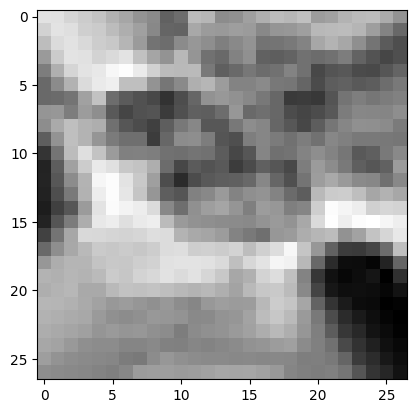

In [91]:
from tensorflow.keras import layers


IMG_SIZE = 32
# image = train_generator[0][0][50]
# batch, images, img_num
# for i in range(27):
#     image = train_generator[0][0][i]
#     plt.imshow(image)
image = train_generator[0][0][0]
plt.imshow(image, cmap='gray')

# resize_and_rescale = tf.keras.Sequential([
# #   layers.Resizing(IMG_SIZE, IMG_SIZE),
# #   layers.Rescaling(1./255)
#     layers.RandomFlip("horizontal_and_vertical")
# ])

# result = resize_and_rescale(image)
# _ = plt.imshow(result)

In [65]:
type(train_generator)

keras.preprocessing.image.DataFrameIterator

In [63]:
from tensorflow.keras.utils import save_img

save_img("./wow.png", result)

Massive waste of time and effort
https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/ 

In [ ]:
# # make everything GRAYSCALE

# train_generator = test_datagen.flow_from_dataframe(
#         dataframe=train_data,
#         directory='./patch_images/',
#         x_col="ImageName",
#         y_col="cellType",
#         target_size=(27, 27),
#         color_mode="grayscale",
#         batch_size=batch_size,
#         class_mode='categorical'
# )

# validation_generator = test_datagen.flow_from_dataframe(
#         dataframe=val_data,
#         directory='./patch_images/',
#         x_col="ImageName",
#         y_col="cellType",
#         target_size=(27, 27),
#         color_mode="grayscale",
#         batch_size=batch_size,
#         class_mode='categorical'
# )

# test_generator = test_datagen.flow_from_dataframe(
#         dataframe=test_data,
#         directory='./patch_images/',
#         x_col="ImageName",
#         y_col="cellType",
#         target_size=(27, 27),
#         color_mode="grayscale",
#         batch_size=batch_size,
#         class_mode='categorical'
# )

In [ ]:
# DATA AUGMENTATION
# comment out if you do not want to use this

# train_datagen_aug = ImageDataGenerator(
# #         rotation_range=360, # rotation
#         horizontal_flip=True, # horizontal flip
# #         vertical_flip=True, # horizontal flip
#         rescale=1./255, data_format='channels_last'
# )

# train_generator = train_datagen_aug.flow_from_dataframe(
#         dataframe=train_data,
#         directory='./patch_images/',
#         x_col="ImageName",
#         y_col="cellType",
#         target_size=(27, 27),
#         batch_size=batch_size,
#         class_mode='categorical'
)